In [11]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

In [12]:
X,y=make_blobs(centers=3,random_state=42)

In [13]:
class Cluster:
    def __init__(self,label,center):
        self.center=center
        self.points=[]
        self.label=label
    def relocate(self):
        self.center=np.mean(self.points,axis=0)
        self.points=[]
    def distance(self,point):
        return np.sqrt(((self.center-point)**2).sum())
        

In [14]:
class KMeansCustom:
    def __init__(self,n_clusters=3):
        self.n_clusters=n_clusters
    def fit(self,X):
        self.__X=X
        self.__clusters=[]
        for i in range(self.n_clusters):
            cluster=Cluster(i,random.choice(X))
            self.__clusters.append(cluster)
        for i in range(20):
            labels=[]
            for point in X:
                dist_points=[]
                for cluster in self.__clusters:
                    dist_points.append((cluster.distance(point),cluster))
                selected=sorted(dist_points)[0]
                selected_cluster=selected[1]
                selected_cluster.points.append(point)
                labels.append(selected_cluster.label)
                
            for cluster in self.__clusters:
                cluster.relocate()
                
        list_cc=[]
        for cluster in self.__clusters:
            list_cc.append(cluster.center)
        self.cluster_centers_=np.array(list_cc)
        self.labels_=np.array(labels)

In [15]:
model=KMeansCustom()

In [16]:
model.fit(X)
model.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669]])

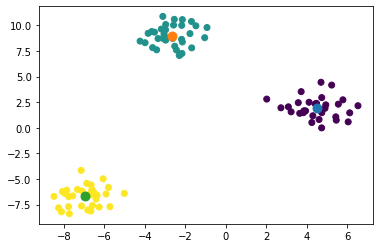

In [17]:
plt.scatter(X[:,0],X[:,1],c=model.labels_)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=80)